In [1]:
from time import sleep
from os import system
import numpy as np
from pandas import DataFrame
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [2]:


x,y=make_regression(n_samples=100,
                   n_features=1,
                   n_informative=1,
                   noise=100,
                   random_state=1961)

In [3]:

def search_line        (x,
                        y, 
                        select_cordinates_x=None,
                        select_cordinates_y=None,
                       green_line=False,
                       blue_line=False):
    
    
    pyplot.scatter(x=x,y=y, c='y')
    pyplot.show()
    
    x_cordinates=[float(input(f"x_{ranger}-->")) for ranger in range(2)]
    y_cordinates=[float(input(f"y_{ranger}-->")) for ranger in range(2)]
    
    print('mmm')
    sleep(3)
    system('clear')
    pyplot.scatter(x=x,y=y, c='y')
    pyplot.plot(x_cordinates,y_cordinates, 'k')
    pyplot.show()
    
    
    okey=True if input('okey ? --') in ['yes', 
                                  'okey',
                                  'ok',
                                  'go',
                                  '1'] else False
    if blue_line:
        pyplot.scatter(x=x,y=y, c='y')
        pyplot.plot(x_cordinates,y_cordinates, 'k')
        pyplot.plot([min(x_cordinates),max(x_cordinates)],
                   [min(y_cordinates),min(y_cordinates)],
                   c='b')
        
        if green_line:
            pyplot.plot([max(x_cordinates),max(x_cordinates)],
                     [min(y_cordinates),max(y_cordinates)],
                      c='g')
            
        pyplot.show()
    
    return [x_cordinates,y_cordinates] if okey else search_line(x,y)
    

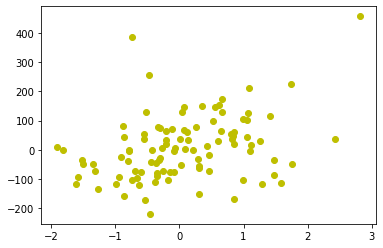

x_0-->-1.5
x_1-->3
y_0-->-95
y_1-->130
mmm


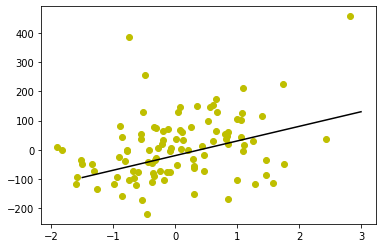

okey ? --okey


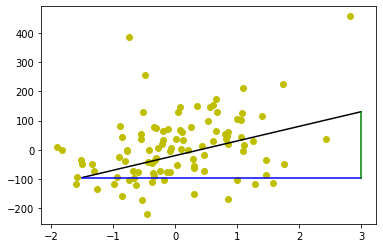

In [5]:
x_cordinates,y_cordinates= search_line(x,
                                       y,
                                       select_cordinates_x=None,
                                       select_cordinates_y=None,
                                       
                                       green_line=True,
                                       blue_line=True)

In [7]:
x_cordinates

[-1.5, 3.0]

In [8]:
y_cordinates

[-95.0, 130.0]

In [55]:
blue_line=max(x_cordinates)-min(x_cordinates)

In [56]:
green_line=max(y_cordinates)-min(y_cordinates)

In [59]:
blue_line, green_line

(4.5, 225.0)

In [60]:
tg_alfa=green_line/blue_line

In [61]:
tg_alfa

50.0

In [62]:
vector_up=False
if max(y_cordinates)==y_cordinates[-1]:
    vector_up=True
weights=tg_alfa
bias=y_cordinates[0]

In [64]:
weights

50.0

In [63]:
bias

-95.0

In [65]:
predict=DataFrame(x.dot(weights)+bias)

In [66]:
predict

,0
0,-39.388715
1,-71.687342
2,-42.149535
3,-88.337264
4,-32.290477
...,...
95,-45.074460
96,-162.255050
97,-24.573968
98,-113.339417


In [67]:
predict.columns=['2']

In [68]:
predict.join(DataFrame(y))

,2,0
0,-39.388715,15.999950
1,-71.687342,-72.230075
2,-42.149535,102.971724
3,-88.337264,34.783653
4,-32.290477,28.870043
...,...,...
95,-45.074460,106.680300
96,-162.255050,-49.325992
97,-24.573968,116.132156
98,-113.339417,-44.382674


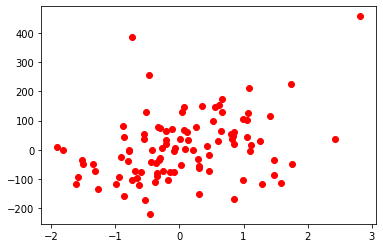

In [69]:
pyplot.scatter(x=x,y=y, c='r')

In [70]:
model=LinearRegression()

In [71]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
y=DataFrame(y, columns=[2])

In [73]:
y

,2
0,15.999950
1,-72.230075
2,102.971724
3,34.783653
4,28.870043
...,...
95,106.680300
96,-49.325992
97,116.132156
98,-44.382674


In [74]:
df=y.join(predict).join(DataFrame(model.predict(x)))

In [75]:
df.columns=['out_values', 'predict_bad','predict_good']

In [76]:
df

,out_values,predict_bad,predict_good
0,15.999950,-39.388715,53.292605
1,-72.230075,-71.687342,25.849795
2,102.971724,-42.149535,50.946850
3,34.783653,-88.337264,11.703044
4,28.870043,-32.290477,59.323685
...,...,...,...
95,106.680300,-45.074460,48.461662
96,-49.325992,-162.255050,-51.101846
97,116.132156,-24.573968,65.880083
98,-44.382674,-113.339417,-9.540253


In [77]:
df=DataFrame(x, columns=['in_values']).join(df)

In [78]:
df['error in good']=df['predict_good']-df['out_values']

In [79]:
df['error in bad']=df['predict_bad']-df['out_values']

In [80]:
df

,in_values,out_values,predict_bad,predict_good,error in good,error in bad
0,1.112226,15.999950,-39.388715,53.292605,37.292655,-55.388664
1,0.466253,-72.230075,-71.687342,25.849795,98.079869,0.542732
2,1.057009,102.971724,-42.149535,50.946850,-52.024875,-145.121260
3,0.133255,34.783653,-88.337264,11.703044,-23.080609,-123.120917
4,1.254190,28.870043,-32.290477,59.323685,30.453642,-61.160520
...,...,...,...,...,...,...
95,0.998511,106.680300,-45.074460,48.461662,-58.218638,-151.754760
96,-1.345101,-49.325992,-162.255050,-51.101846,-1.775855,-112.929058
97,1.408521,116.132156,-24.573968,65.880083,-50.252072,-140.706124
98,-0.366788,-44.382674,-113.339417,-9.540253,34.842420,-68.956744


In [81]:
error_sum_bad=np.sum([abs(element) for element in df['error in bad']])

In [82]:
error_sum_bad

11516.793692065474

In [83]:
error_sum_good=np.sum([abs(element) for element in  df['error in good']])

In [84]:
error_sum_good

7718.9054074419455

In [85]:
mean_error_bad=np.mean(df['error in bad']**2)
mean_error_good=np.mean(df['error in good']**2)

In [86]:
mean_error_bad

20805.328106316367

In [87]:
mean_error_good

10620.024572816861